# 2024-1 DSL 정규세션 과제
## Regression

- 작성자 : 9기 이승원
- 참고자료 : 해당 실습 자료는 23-2 응용통계학과 김현중 교수님의 [데이터마이닝]의 수업자료와 해당 수업에서 본 출제자가 진행한 프로젝트를 기반으로 만들었습니다.
- 과제 제출 기한 : 02.03

---
- 이름 : 윤정수    
- 기수 : 11기    

#Setting

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [32]:
import pandas as pd
import numpy as np

In [33]:
df = pd.read_excel('/Users/jeongsooyoon/Desktop/DSL/DSL 세션 24-1/회귀_SVM_비지도 통합과제/Regression/bicycle_data.xlsx') #경로변환필요
df.head()

,행정동,이용건수,행정동코드,자치구,대여소개수,이용거리(M),이용시간(분),LCD_거치_대수,QR_거치_대수,상권_수,...,여자20s생활인구,여자30s생활인구,여자40s생활인구,여자50s생활인구,여자60s생활인구,여자70s이상생활인구,아파트_단지_수,아파트_평균_시가,길단위유동인구,직장인구
0,청운효자동,11755,11110515,종로구,3,2.904426e+07,284027,5,59,5,...,2.885425e+06,3.143521e+06,3.745018e+06,3.170072e+06,2.157854e+06,2.640629e+06,323,276146690,14261,41
1,사직동,58976,11110530,종로구,12,1.243033e+08,1195279,99,139,6,...,5.133218e+06,6.282004e+06,5.561868e+06,4.041477e+06,2.650009e+06,2.740232e+06,89,371237211,34035,413
2,삼청동,15960,11110540,종로구,5,3.520926e+07,368791,23,38,1,...,1.157874e+06,1.197700e+06,1.266266e+06,9.427540e+05,7.849797e+05,7.954017e+05,9,401044841,6745,40
3,부암동,4353,11110550,종로구,5,1.896218e+07,126968,23,26,5,...,2.305686e+06,1.908983e+06,2.804853e+06,2.466070e+06,1.871393e+06,2.216136e+06,189,259634651,5001,18
4,평창동,3810,11110560,종로구,5,1.410898e+07,94067,15,23,3,...,1.935554e+06,2.306512e+06,3.250538e+06,3.803050e+06,3.117086e+06,3.559939e+06,294,480839259,878,26


#Linear Regression

## 전처리

분석에 필요하지 않은 열 제거
독립변수의 임의 제거가 아니라, 애초에 분석에 불필요한 정보를 제거한다

In [34]:
df1 = df.drop(['행정동', '행정동코드', '자치구', '대여소개수',  '이용거리(M)', '이용시간(분)',
       'LCD_거치_대수', 'QR_거치_대수'], axis=1)

drop후 열들을 확인해본다

In [35]:
df1.columns

Index(['이용건수', '상권_수', '집객시설_수', '관공서_수', '은행_수', '총병원_수', '종합병원_수', '일반_병원_수',
       '약국_수', '유치원_수', '초중고등학교_수', '초등학교_수', '중학교_수', '고등학교_수', '대학교_수',
       '백화점_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수', '0s_foreigner', '10s_foreigner',
       '20s_foreigner', '30s_foreigner', '40s_foreigner', '50s_foreigner',
       '60s_foreigner', '70s_foreigner', '80s_foreigner', '90s_foreigner',
       '100s_foreigner', '0s_korean', '10s_korean', '20s_korean', '30s_korean',
       '40s_korean', '50s_korean', '60s_korean', '70s_korean', '80s_korean',
       '90s_korean', '100s_korean', '총생활인구수', '대중교통_승차', '지하철_승차', '버스_승차',
       '대중교통_하차', '지하철_하차', '버스_하차', '남자0s생활인구', '남자10s생활인구', '남자20s생활인구',
       '남자30s생활인구', '남자40s생활인구', '남자50s생활인구', '남자60s생활인구', '남자70s이상생활인구',
       '여자0s생활인구', '여자10s생활인구', '여자20s생활인구', '여자30s생활인구', '여자40s생활인구',
       '여자50s생활인구', '여자60s생활인구', '여자70s이상생활인구', '아파트_단지_수', '아파트_평균_시가',
       '길단위유동인구', '직장인구'],
      dtype='object')

데이터를 살펴보면 알 수 있듯이, 각 변수들의 데이터 값들의 범위는 상당히 다르다.

회귀분석은 데이터의 단위(범위)에 민감하기 때문에 스케일링을 해줘야 한다.

In [36]:
df1

,이용건수,상권_수,집객시설_수,관공서_수,은행_수,총병원_수,종합병원_수,일반_병원_수,약국_수,유치원_수,...,여자20s생활인구,여자30s생활인구,여자40s생활인구,여자50s생활인구,여자60s생활인구,여자70s이상생활인구,아파트_단지_수,아파트_평균_시가,길단위유동인구,직장인구
0,11755,5,24,3,1,0,0,0,1,0,...,2.885425e+06,3.143521e+06,3.745018e+06,3.170072e+06,2.157854e+06,2.640629e+06,323,276146690,14261,41
1,58976,6,200,12,22,0,0,0,20,0,...,5.133218e+06,6.282004e+06,5.561868e+06,4.041477e+06,2.650009e+06,2.740232e+06,89,371237211,34035,413
2,15960,1,16,3,1,0,0,0,0,0,...,1.157874e+06,1.197700e+06,1.266266e+06,9.427540e+05,7.849797e+05,7.954017e+05,9,401044841,6745,40
3,4353,5,46,3,2,0,0,0,2,0,...,2.305686e+06,1.908983e+06,2.804853e+06,2.466070e+06,1.871393e+06,2.216136e+06,189,259634651,5001,18
4,3810,3,86,4,1,0,0,0,2,1,...,1.935554e+06,2.306512e+06,3.250538e+06,3.803050e+06,3.117086e+06,3.559939e+06,294,480839259,878,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,65958,5,119,4,5,0,0,0,13,1,...,4.100588e+06,4.508070e+06,5.078307e+06,4.802777e+06,4.100662e+06,4.233233e+06,460,212466670,103677,72
420,67324,8,228,6,9,5,1,4,35,4,...,8.100074e+06,9.606454e+06,1.003074e+07,1.050778e+07,9.221236e+06,9.993622e+06,618,227597799,104558,58
421,6046,0,0,0,0,0,0,0,0,0,...,4.623928e+05,5.626901e+05,8.728238e+05,7.819439e+05,6.641561e+05,7.958338e+05,4,854201839,93,17
422,31293,5,56,4,2,0,0,0,5,2,...,3.285450e+06,4.040530e+06,4.538618e+06,4.752250e+06,4.024634e+06,4.670248e+06,316,261960069,45335,32



- Point 1: Robust Scaler를 사용한 이유는 해당 스케일링 기법이 중앙값과 사분위수 범위를 사용하므로 이상치에 덜 민감하기 때문이다. 따라서 따로 이상치 제거를 해주지 않았다. (다른 스케일링 방법을 사용한다면 이상치를 확인하고 제거해주는 것이 바람직하다)

- Point 2: 이것은 모르면 에러가 뜨는 부분이다. ols를 돌릴 때, 컬럼명이 숫자로 시작하면 오류가 뜬다. (출제자가 실제 회귀분석과제를 할 때 에러가 떠서 고생을 했던 기억이 있어 꼭 기억하면 좋겠다.)

In [37]:
from sklearn.preprocessing import RobustScaler
# 변형 객체 생성
robust_scaler = RobustScaler()

# 훈련데이터의 모수 분포 저장
robust_scaler.fit(df1)

# 훈련 데이터 스케일링
all_scaled = robust_scaler.transform(df1)
df2_scaled = pd.DataFrame(all_scaled, columns = df1.columns)

# 회귀 분석에 맞게 컬럼명 변경 (원래 숫자로 되어 있던 컬럼명에 언더바를 추가해줌)
df2_scaled.columns = ['이용건수', '상권_수', '집객시설_수', '관공서_수', '은행_수', '총병원_수', '종합병원_수', '일반_병원_수',
       '약국_수', '유치원_수', '초중고등학교_수', '초등학교_수', '중학교_수', '고등학교_수', '대학교_수',
       '백화점_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수', '_0s_foreigner', '_10s_foreigner',
       '_20s_foreigner', '_30s_foreigner', '_40s_foreigner', '_50s_foreigner',
       '_60s_foreigner', '_70s_foreigner', '_80s_foreigner', '_90s_foreigner',
       '_100s_foreigner', '_0s_korean', '_10s_korean', '_20s_korean', '_30s_korean',
       '_40s_korean', '_50s_korean', '_60s_korean', '_70s_korean', '_80s_korean',
       '_90s_korean', '_100s_korean', '총생활인구수', '대중교통_승차', '지하철_승차', '버스_승차',
       '대중교통_하차', '지하철_하차', '버스_하차', '남자0s생활인구', '남자10s생활인구', '남자20s생활인구',
       '남자30s생활인구', '남자40s생활인구', '남자50s생활인구', '남자60s생활인구', '남자70s이상생활인구',
       '여자0s생활인구', '여자10s생활인구', '여자20s생활인구', '여자30s생활인구', '여자40s생활인구',
       '여자50s생활인구', '여자60s생활인구', '여자70s이상생활인구', '아파트_단지_수', '아파트_평균_시가',
       '길단위유동인구', '직장인구']

In [38]:
df2_scaled

,이용건수,상권_수,집객시설_수,관공서_수,은행_수,총병원_수,종합병원_수,일반_병원_수,약국_수,유치원_수,...,여자20s생활인구,여자30s생활인구,여자40s생활인구,여자50s생활인구,여자60s생활인구,여자70s이상생활인구,아파트_단지_수,아파트_평균_시가,길단위유동인구,직장인구
0,-0.370264,0.333333,-0.422145,0.5,0.00,0.0,0.0,0.0,-0.555556,0.0,...,-0.186164,-0.188702,0.023044,-0.156918,-0.370213,-0.254954,0.444662,0.046755,-0.752024,0.000000
1,1.192504,0.666667,2.013841,5.0,5.25,0.0,0.0,0.0,1.555556,0.0,...,0.476562,0.844300,0.655541,0.240888,-0.086386,-0.200455,-0.472086,0.450052,-0.385100,5.975904
2,-0.231101,-1.000000,-0.532872,0.5,0.00,0.0,0.0,0.0,-0.666667,0.0,...,-0.695505,-0.829151,-0.839882,-1.173713,-1.161956,-1.264595,-0.785504,0.576471,-0.891490,-0.016064
3,-0.615232,0.333333,-0.117647,0.5,0.25,0.0,0.0,0.0,-0.444444,0.0,...,-0.357091,-0.595038,-0.304255,-0.478303,-0.535416,-0.487221,-0.080313,-0.023275,-0.923851,-0.369478
4,-0.633202,-0.333333,0.435986,1.0,0.00,0.0,0.0,0.0,-0.444444,1.0,...,-0.466219,-0.464196,-0.149099,0.132043,0.182979,0.248059,0.331048,0.914894,-1.000357,-0.240964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,1.423572,0.333333,0.892734,1.0,1.00,0.0,0.0,0.0,0.777778,1.0,...,0.172107,0.260426,0.487200,0.588430,0.750212,0.616461,0.981391,-0.223324,0.907170,0.497992
420,1.468779,1.333333,2.401384,2.0,2.00,5.0,1.0,4.0,3.222222,4.0,...,1.351293,1.938511,2.211284,3.192828,3.703267,3.768333,1.600392,-0.159150,0.923517,0.273092
421,-0.559202,-1.333333,-0.754325,-1.0,-0.25,0.0,0.0,0.0,-0.666667,0.0,...,-0.900557,-1.038158,-0.976850,-1.247125,-1.231635,-1.264358,-0.805093,2.498394,-1.014924,-0.385542
422,0.276341,0.333333,0.020761,1.0,0.25,0.0,0.0,0.0,-0.111111,2.0,...,-0.068223,0.106540,0.299318,0.565363,0.706366,0.855579,0.417238,-0.013413,-0.175418,-0.144578


## 변수 선택

독립변수와 종속변수에 해당하는 변수들을 각각 할당한다.

In [39]:
X = df2_scaled.drop('이용건수', axis=1)
y = df2_scaled['이용건수']

파이썬 자체적으로 제공해주는 feature selection 모듈이 없다. 따라서 코드를 짜거나, 누가 짜놓은 코드를 가져와서 쓰면 된다.

번거로우니 feature_selection.py 파일을 불러와서 사용해보자. py파일을 열어보면 몇 개의 변수 선택 메소드가 주어져 있다.

- point 1: 선형회귀분석이니 'linear' 입력
- point 2: aic 값을 기준으로 선택할 것이기 때문에 'aic' 입력

모듈로 불러와서 사용해보자

1. 현재 위치 파악을 파악한다

In [40]:
pwd

'/Users/jeongsooyoon/Desktop/DSL/DSL 세션 24-1/회귀_SVM_비지도 통합과제/Regression'

2. 본인 환경에 맞는 디렉토리 설정 (py 파일이 있는 곳으로 옮겨야 함)
- Jupyter Notebook에서 할 때는 이 과정 불필요, 바로 import하면 됨

In [41]:
cd /Users/jeongsooyoon/Desktop/DSL/DSL 세션 24-1/회귀_SVM_비지도 통합과제/Regression

/Users/jeongsooyoon/Desktop/DSL/DSL 세션 24-1/회귀_SVM_비지도 통합과제/Regression


3. 잘 옮겨졌는지 확인

In [42]:
pwd

'/Users/jeongsooyoon/Desktop/DSL/DSL 세션 24-1/회귀_SVM_비지도 통합과제/Regression'

In [60]:
import sys
sys.path.append('/Users/jeongsooyoon/Desktop/DSL/DSL 세션 24-1/회귀_SVM_비지도 통합과제/Regression/feature_selection.py') # 각자 환경에 맞게 위치 경로 설정해주세요!

In [61]:
import feature_selection as fsel

fsel.forwardSelection(X, y, model_type='linear', elimination_criteria='aic')

/Users/jeongsooyoon/Desktop/DSL/DSL 세션 24-1/회귀_SVM_비지도 통합과제/Regression/feature_selection.py:96: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  print("Character Variables (Dummies Generated, First Dummies Dropped):", dtypes[dtypes == np.object].index.tolist())


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

feature selection을 하면 몇 개의 변수가 선택된다.
해당 변수들이 다중공선성을 만족하는지 확인 후, 다중공선성을 만족한다는 변수들의 조합으로 선형회귀 분석을 진행한다.

* 다중공선성 판별 기준: VIF값 10 이하


**선택된 변수들로 선형회귀분석을 진행해봅시다**
- point 1: feature selection을 통해 선택된 변수들 중,
- point 2: 다중공선성 문제가 없어야 만족해야 함.

In [62]:
# feature selection을 통해 선택된 변수들을 리스트 형태로 입력하세요!

selected_cols =  ['남자40s생활인구',
 '_30s_korean',
 '아파트_단지_수',
 '길단위유동인구',
 '초등학교_수',
 '직장인구',
 '지하철_하차']

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 데이터프레임 초기화
vif_data = df2_scaled[selected_cols].copy()  # X를 복사하여 사용합니다.

# VIF 계산
vif_data['Intercept'] = 1  # 상수항을 위한 Intercept 추가
vif_series = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index=vif_data.columns)

vif_df = pd.DataFrame(vif_series)
vif_df = vif_df.reset_index()
vif_df.columns = ['col', 'vif']
vif_df

# VIF 출력
#print(vif_series)

# VIF 10 이상 삭제
selected_cols = []
for i in range(len(vif_df)):
    if vif_df['vif'][i] < 10:
        selected_cols.append(vif_df['col'][i])

selected_cols.remove('Intercept')
selected_cols

['남자40s생활인구', '_30s_korean', '아파트_단지_수', '길단위유동인구', '초등학교_수', '직장인구', '지하철_하차']

In [64]:
import statsmodels.formula.api as smf

In [65]:
model = smf.ols(formula = "이용건수~ " + "+".join(selected_cols).replace(" ", "_"),
                 data=df2_scaled)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   이용건수   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     37.31
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           1.75e-40
Time:                        15:49:26   Log-Likelihood:                -606.08
No. Observations:                 424   AIC:                             1228.
Df Residuals:                     416   BIC:                             1261.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1797      0.057      3.148      0.002       0.067       0.292
남자40s생활인구       0.4433      0.071      6.228      0.000       0.303       0.583
_30s_korean     0.4910      0.090      5.451      0.000       0.314       0.668
아파트_단지_수       -0.3688      0.072     -5.098      0.000      -0.511      -0.227
길단위유동인구        -0.1829      0.067     -2.712      0.007      -0.316      -0.050
초등학교_수          0.7257      0.273      2.662      0.008       0.190       1.262
직장인구           -0.0668      0.024     -2.775      0.006      -0.114      -0.019
지하철_하차          0.1150      0.053      2.169      0.031       0.011       0.219
==============================================================================
Omnibus:                      386.066   Durbin-Watson:                   1.532
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20893.959
Skew:                           3.582   Prob(JB):                         0.00
Kurtosis:                      36.636   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Evaluation

In [66]:
#sklearn 패키지의 model_selection 모듈에서 train_test_split 함수를 사용

from sklearn.model_selection import train_test_split
train, test = train_test_split(df2_scaled, test_size=0.3, random_state=1)
print('train:', len(train), '| test:', len(test))

X_train = train.drop(['이용건수'], axis=1)
y_train = train['이용건수']
X_test = test.drop(['이용건수'], axis=1)
y_test = test['이용건수']

from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse
pred = result.predict(X_test)

train: 296 | test: 128


In [67]:
print(f'r2: {r2(y_test, pred)}')
print(f'mse: {mse(y_test, pred)}')
print(f'mae: {mae(y_test, pred)}')
print(f'mape: {mape(y_test, pred)}')

r2: 0.4645130532216031
mse: 1.595029464250069
mae: 0.689016731517567
mape: 2.2034124083054962


## 회귀진단
: 다중공선성 앞에서 이미 제거하고 시작했으니 double-check할 필요는 없다.

In [68]:
import statsmodels.api as sm

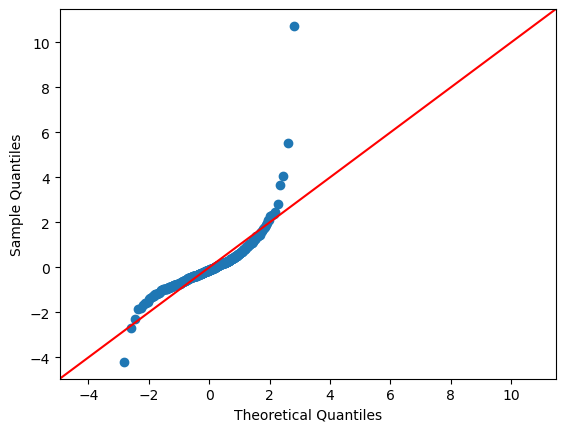

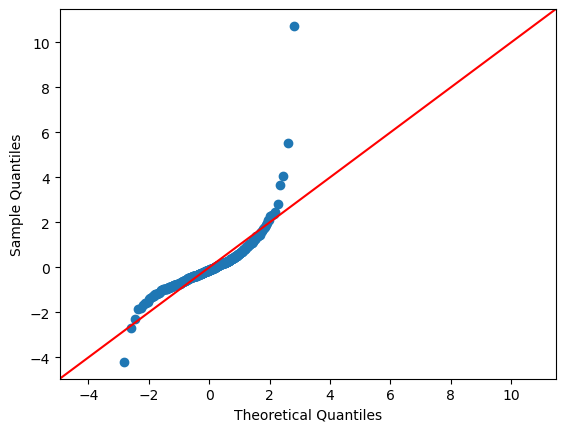

In [69]:
import seaborn as sns
import matplotlib as plt

sm.qqplot(result.resid, fit=True, line='45')

<Axes: xlabel='fitted', ylabel='resid'>

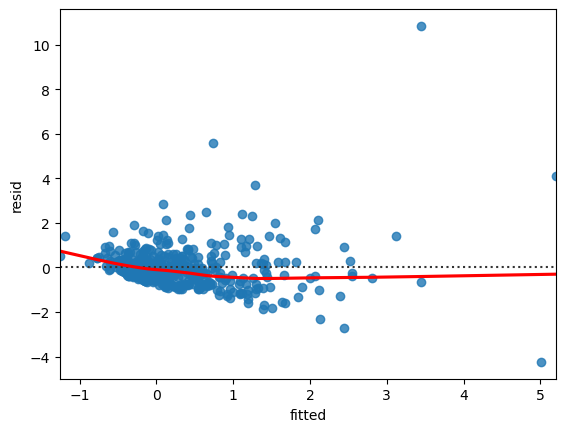

In [70]:
eqvar = pd.DataFrame({'fitted': result.fittedvalues, 'resid' : result.resid })
sns.residplot(x='fitted', y='resid', data=eqvar, line_kws={'color':'red'}, lowess=True)

[To-Do]
1. Robust 이외의 다른 방식으로 스케일링을 해보는 방식으로 전처리를 해본다.
2. 전진선택, 후진선택 두 가지 방법을 사용하여 변수선택을 해본다.
3. 다중공선성을 제거한다

⟹ 이 과정을 통해 다양한 변수들의 조합이 나올 수 있다
example;
- model1 : min-max scaling + forward selection + 다중공선성 제거
- model2 : min-max scaling + backward selection + 다중공선성 제거
4. R squared 값이 가장 높은 변수 조합의 모델을 선택하여 최종 모형으로 삼는다.
5. evaluation과 회귀진단을 시행한다.


#Logistic Regression

In [71]:
import pandas as pd
df = pd.read_excel('bicycle_data.xlsx')

## 전처리

0.5를 기준으로 레이블링을 해준다.

※사실 이것은 해당 프로젝트의 여러 시도 중 한 방법으로 굳이 추천하지는 않습니다.

※로지스틱 회귀분석의 전 과정을 이해하기 위해 임의적으로 레이블링을 한 것으로 가정하고, 분석의 과정에 더 집중해주시기를를 바랍니다.

In [72]:
# 중앙값 기준으로 0,1
y_median = df['이용건수'].quantile(0.5)
df['y'] = df['이용건수'].apply(lambda x: 1 if x >= y_median else 0)

# 열 순서 재배치
df = df[['행정동', '이용건수', 'y', '대여소개수', '이용거리(M)', '이용시간(분)', 'LCD_거치_대수', 'QR_거치_대수',
       '상권_수', '집객시설_수', '관공서_수', '은행_수', '총병원_수', '종합병원_수', '일반_병원_수', '약국_수',
       '유치원_수', '초중고등학교_수', '초등학교_수', '중학교_수', '고등학교_수', '대학교_수', '백화점_수',
       '슈퍼마켓_수', '극장_수', '숙박_시설_수', '0s_foreigner', '10s_foreigner',
       '20s_foreigner', '30s_foreigner', '40s_foreigner', '50s_foreigner',
       '60s_foreigner', '70s_foreigner', '80s_foreigner', '90s_foreigner',
       '100s_foreigner', '0s_korean', '10s_korean', '20s_korean', '30s_korean',
       '40s_korean', '50s_korean', '60s_korean', '70s_korean', '80s_korean',
       '90s_korean', '100s_korean', '총생활인구수', '대중교통_승차', '지하철_승차', '버스_승차',
       '대중교통_하차', '지하철_하차', '버스_하차', '남자0s생활인구', '남자10s생활인구', '남자20s생활인구',
       '남자30s생활인구', '남자40s생활인구', '남자50s생활인구', '남자60s생활인구', '남자70s이상생활인구',
       '여자0s생활인구', '여자10s생활인구', '여자20s생활인구', '여자30s생활인구', '여자40s생활인구',
       '여자50s생활인구', '여자60s생활인구', '여자70s이상생활인구', '길단위유동인구', '직장인구']]

# 이 과정이 필요한 이유: logistic model 돌릴 때 숫자로 시작하거나, (~) 같은게 포함되어 있으면 분석이 제대로 안됨
df.columns = ['행정동', '이용건수', 'y', '대여소개수', '이용거리', '이용시간', 'LCD_거치_대수', 'QR_거치_대수',
       '상권_수', '집객시설_수', '관공서_수', '은행_수', '총병원_수', '종합병원_수', '일반_병원_수', '약국_수',
       '유치원_수', '초중고등학교_수', '초등학교_수', '중학교_수', '고등학교_수', '대학교_수', '백화점_수',
       '슈퍼마켓_수', '극장_수', '숙박_시설_수', '_0s_foreigner', '_10s_foreigner',
       '_20s_foreigner', '_30s_foreigner', '_40s_foreigner', '_50s_foreigner',
       '_60s_foreigner', '_70s_foreigner', '_80s_foreigner', '_90s_foreigner',
       '_100s_foreigner', '_0s_korean', '_10s_korean', '_20s_korean', '_30s_korean',
       '_40s_korean', '_50s_korean', '_60s_korean', '_70s_korean', '_80s_korean',
       '_90s_korean', '_100s_korean', '총생활인구수', '대중교통_승차', '지하철_승차', '버스_승차',
       '대중교통_하차', '지하철_하차', '버스_하차', '남자0s생활인구', '남자10s생활인구', '남자20s생활인구',
       '남자30s생활인구', '남자40s생활인구', '남자50s생활인구', '남자60s생활인구', '남자70s이상생활인구',
       '여자0s생활인구', '여자10s생활인구', '여자20s생활인구', '여자30s생활인구', '여자40s생활인구',
       '여자50s생활인구', '여자60s생활인구', '여자70s이상생활인구', '길단위유동인구', '직장인구']


## Modeling

In [73]:
# X, y 나누기
X = df.drop(['행정동', '이용건수', 'y', '이용거리','이용시간','대여소개수'], axis=1)
y = df['y']

In [74]:
# 변수 선택을 위한 AIC 최적화 함수: 전진선택
def forward_selection_AIC(X, y):
    features = X.columns
    selected_features = []
    best_aic = float('inf')

    for feature in features:
        model = sm.Logit(y, sm.add_constant(df[selected_features + [feature]]))
        result = model.fit()
        current_aic = result.aic

        if current_aic < best_aic:
            best_aic = current_aic
            selected_features.append(feature)

    return selected_features, best_aic

# 목표 변수와 데이터 프레임을 지정하여 변수 선택 수행
response_variable = 'y'
selected_features, best_aic = forward_selection_AIC(X, y)

# 결과 출력
print("Selected Features:", selected_features)
print("Best AIC:", best_aic)

Optimization terminated successfully.
         Current function value: 0.502605
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.389764
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.389611
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.389731
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.381440
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.380133
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.380471
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.379984
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.379487
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.375832
  

/Users/jeongsooyoon/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.354156
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.353815
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.354803
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.347592
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.347586
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.347581
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.347535
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.344853
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.344164
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.344310
  

선택된 feature들을 가지고 model fitting

In [75]:
x_formula = '+'.join(selected_features)
x_formula = 'y~'+ x_formula
x_formula = x_formula.replace(" ", "")

model1 = smf.glm(formula = x_formula, data = df, family=sm.families.Binomial())
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  424
Model:                            GLM   Df Residuals:                      410
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -138.52
Date:                Wed, 31 Jan 2024   Deviance:                       277.04
Time:                        15:49:44   Pearson chi2:                     460.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5195
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -4.6182      0.577     -8.006      0.000      -5.749      -3.488
LCD_거치_대수          0.0622      0.010      6.407      0.000       0.043       0.081
QR_거치_대수           0.0649      0.008      7.816      0.000       0.049       0.081
관공서_수             -0.2034      0.083     -2.450      0.014      -0.366      -0.041
약국_수               0.0147      0.024      0.627      0.531      -0.031       0.061
대학교_수             -0.4014      0.158     -2.539      0.011      -0.711      -0.092
_50s_foreigner    -0.0140      0.007     -1.890      0.059      -0.029       0.001
_60s_foreigner     0.0250      0.013      1.896      0.058      -0.001       0.051
_20s_korean        0.0004      0.000      2.717      0.007       0.000       0.001
버스_승차           -1.04e-06   4.25e-07     -2.445      0.014   -1.87e-06   -2.06e-07
남자0s생활인구       -8.396e-07   2.89e-07     -2.901      0.004   -1.41e-06   -2.72e-07
남자60s생활인구       8.929e-07   7.88e-07      1.133      0.257   -6.52e-07    2.44e-06
남자70s이상생활인구     -1.61e-06   6.47e-07     -2.488      0.013   -2.88e-06   -3.42e-07
여자50s생활인구       9.129e-07   4.08e-07      2.236      0.025    1.13e-07    1.71e-06
==================================================================================
"""

In [56]:
pwd

'/Users/jeongsooyoon/Desktop/DSL/DSL 세션 24-1/회귀_SVM_비지도 통합과제/Regression'

In [76]:
# 앞에서 했던 방식과 동일하게 모듈을 불러옴
sys.path.append('/Users/jeongsooyoon/Desktop/DSL/DSL 세션 24-1/회귀_SVM_비지도 통합과제/Regression/gof_logistic.py') # 각자 환경에 맞게 위치 경로 설정해주세요!

In [77]:
sys.path

['/Users/jeongsooyoon/Desktop/DSL/DSL 세션 24-1/회귀_SVM_비지도 통합과제/Regression',
 '/Users/jeongsooyoon/anaconda3/lib/python311.zip',
 '/Users/jeongsooyoon/anaconda3/lib/python3.11',
 '/Users/jeongsooyoon/anaconda3/lib/python3.11/lib-dynload',
 '',
 '/Users/jeongsooyoon/anaconda3/lib/python3.11/site-packages',
 '/Users/jeongsooyoon/anaconda3/lib/python3.11/site-packages/aeosa',
 '/content/gdrive/MyDrive/0116_regression/feature_selection.py',
 '/Users/jeongsooyoon/Desktop/DSL/DSL 세션 24-1/회귀_SVM_비지도 통합과제/Regression',
 '/Users/jeongsooyoon/Desktop/DSL/DSL 세션 24-1/회귀_SVM_비지도 통합과제/Regression',
 '/content/gdrive/MyDrive/0116_regression/gof_logistic.py',
 '/Users/jeongsooyoon/Desktop/DSL/DSL 세션 24-1/회귀_SVM_비지도 통합과제/Regression/feature_selection.py',
 '/Users/jeongsooyoon/Desktop/DSL/DSL 세션 24-1/회귀_SVM_비지도 통합과제/Regression/feature_selection.py',
 '/Users/jeongsooyoon/Desktop/DSL/DSL 세션 24-1/회귀_SVM_비지도 통합과제/Regression/go

p-value가 0.05이상이면 설명력을 갖는다고 봅니다. (주의!)

In [78]:
import gof_logistic as gof
gof.HosmerLemeshow(result1, y)

,Chi2,p - value
0,0.92,0.08


오즈를 계산해봅시다

In [79]:
import numpy as np
odds = np.exp(result1.params)
odds

Intercept         0.009870
LCD_거치_대수         1.064165
QR_거치_대수          1.067069
관공서_수             0.815965
약국_수              1.014850
대학교_수             0.669404
_50s_foreigner    0.986098
_60s_foreigner    1.025327
_20s_korean       1.000362
버스_승차             0.999999
남자0s생활인구          0.999999
남자60s생활인구         1.000001
남자70s이상생활인구       0.999998
여자50s생활인구         1.000001
dtype: float64